In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [3]:
def get_apps_dataset():
    app_train = pd.read_csv('../data/home-credit-default-risk/application_train.csv')
    app_test = pd.read_csv('../data/home-credit-default-risk/application_test.csv')
    apps = pd.concat([app_train, app_test])
    
    return app_train, app_test, apps 

In [4]:
app_train, app_test, apps = get_apps_dataset()

In [5]:
def get_apps_processed(apps):
    apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
    apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())
    
    apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_CREDIT']
    apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_CREDIT']
    apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']
    
    apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_INCOME_TOTAL']
    apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['CNT_FAM_MEMBERS']
    
    apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED'] / apps['DAYS_BIRTH']
    apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_EMPLOYED']
    apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
    apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']
    
    return apps

In [6]:
prev = pd.read_csv('../data/home-credit-default-risk/previous_application.csv')
print(prev.shape, apps.shape)
prev.head()

(1670214, 37) (356255, 122)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
prev_app_outer = prev.merge(apps['SK_ID_CURR'], on='SK_ID_CURR', how='outer', indicator=True)
prev_app_outer.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,_merge
0,2030495.0,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.000000,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,both
1,1696966.0,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18.0,Y,1.0,0.101325,NaN,NaN,XAP,Refused,-472.0,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55.0,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,both
2,2154916.0,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-548.0,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196.0,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,both
3,2802425.0,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,both
4,1536272.0,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-515.0,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6.0,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,both
5,2068863.0,108129,Consumer loans,4830.930,47250.0,23688.0,24750.0,47250.0,THURSDAY,11.0,Y,1.0,0.556485,NaN,NaN,XAP,Approved,-619.0,Cash through the bank,XAP,Family,Repeater,Audio/Video,POS,XNA,Stone,110.0,Consumer electronics,6.0,high,POS household with interest,365243.0,-588.0,-438.0,-588.0,-580.0,0.0,both
6,2551979.0,108129,Consumer loans,6664.275,71352.0,71352.0,0.0,71352.0,WEDNESDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-1208.0,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Stone,108.0,Furniture,12.0,low_normal,POS industry with interest,365243.0,-1176.0,-846.0,-846.0,-840.0,0.0,both
7,2517198.0,108129,Revolving loans,11250.000,0.0,225000.0,NaN,NaN,TUESDAY,13.0,Y,1.0,NaN,NaN,NaN,XAP,Approved,-957.0,XNA,XAP,NaN,Repeater,XNA,Cards,x-sell,Contact center,-1.0,XNA,0.0,XNA,Card X-Sell,-713.0,-673.0,365243.0,-461.0,-61.0,0.0,both
8,1760610.0,108129,Consumer loans,8593.965,33052.5,33052.5,0.0,33052.5,SUNDAY,10.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-819.0,Cash through the bank,XAP,Unaccompanied,Repeater,Computers,POS,XNA,Stone,108.0,Furniture,4.0,low_action,POS industry with interest,365243.0,-783.0,-693.0,-753.0,-748.0,0.0,both
9,2523466.0,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,both


In [8]:
prev_app_outer['_merge'].value_counts()

both          1670214
right_only      17398
left_only           0
Name: _merge, dtype: int64

In [9]:
print(prev.groupby('SK_ID_CURR')['SK_ID_CURR'].count())
print('mean :', prev.groupby('SK_ID_CURR')['SK_ID_CURR'].count().mean())

SK_ID_CURR
100001    1
100002    1
100003    3
100004    1
100005    2
         ..
456251    1
456252    1
456253    2
456254    2
456255    8
Name: SK_ID_CURR, Length: 338857, dtype: int64
mean : 4.928964135313716


<AxesSubplot:xlabel='SK_ID_CURR'>

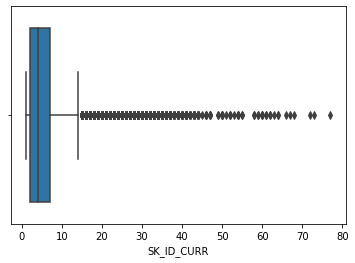

In [10]:
sns.boxplot(prev.groupby('SK_ID_CURR')['SK_ID_CURR'].count())

In [11]:
def show_hist_by_target(df, columns):
    cond_0 = (df['TARGET'] == 0)
    cond_1 = (df['TARGET'] == 1)
    
    for column in columns:
        fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
        sns.violinplot(x='TARGET', y=column, data=df, ax=axs[0][0])
        sns.distplot(df[cond_0][column], label='0', color='blue', ax=axs[0][1])
        sns.distplot(df[cond_1][column], label='1', color='red', ax=axs[0][1])

In [12]:
app_prev = prev.merge(app_train[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
app_prev.shape

(1670214, 38)

In [13]:
num_columns = app_prev.dtypes[app_prev.dtypes != 'object'].index.tolist()
print(num_columns)

['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'TARGET']


In [14]:
num_columns = [column for column in num_columns if column not in ['SK_ID_PREV', 'SK_ID_CURR', 'TARGET']]
print(num_columns)

['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


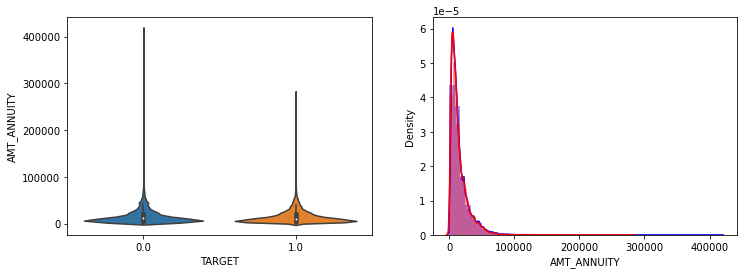

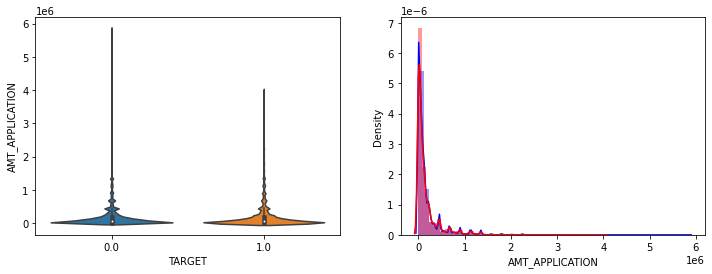

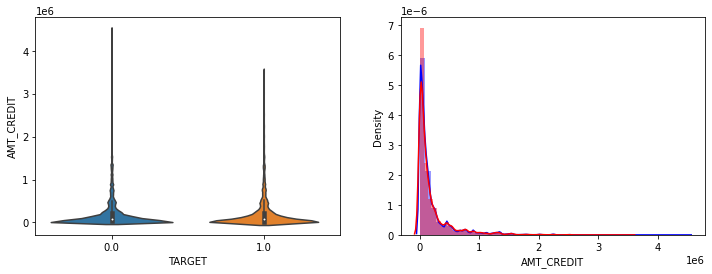

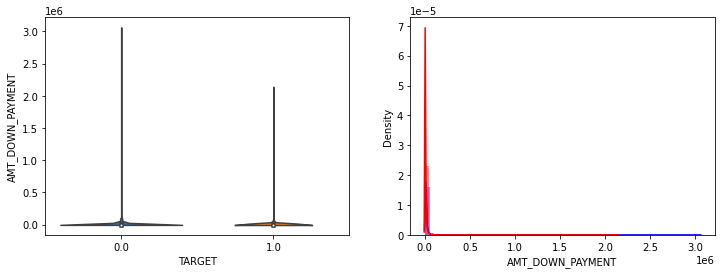

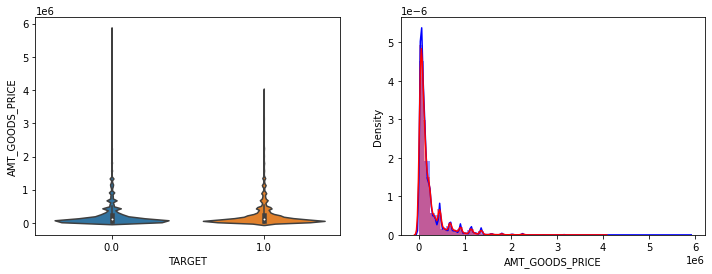

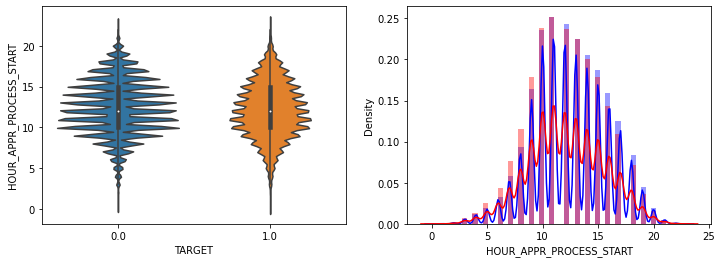

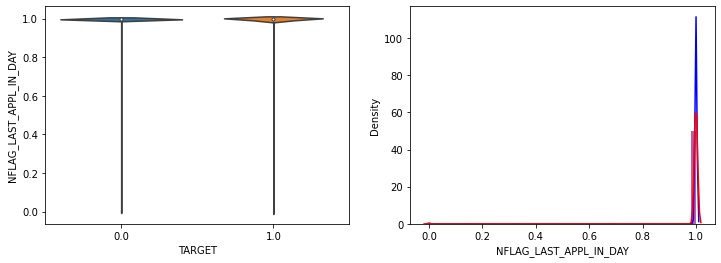

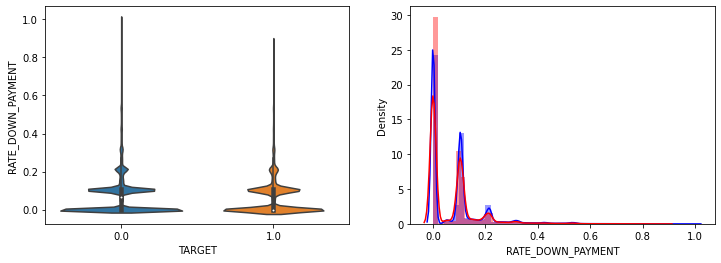

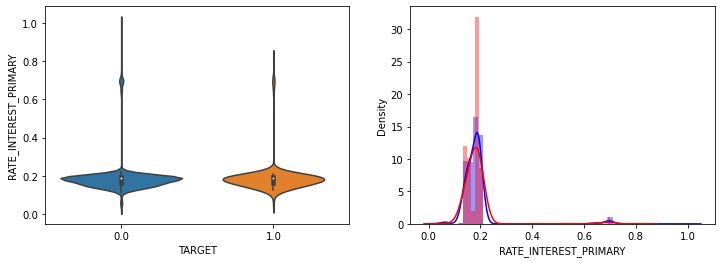

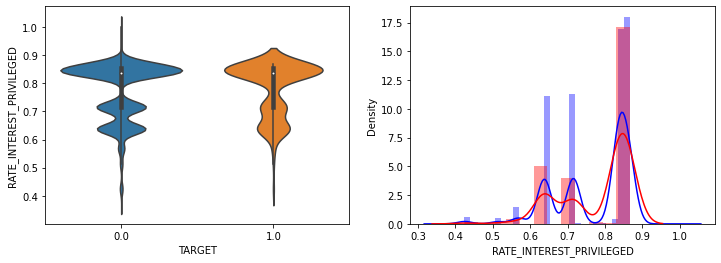

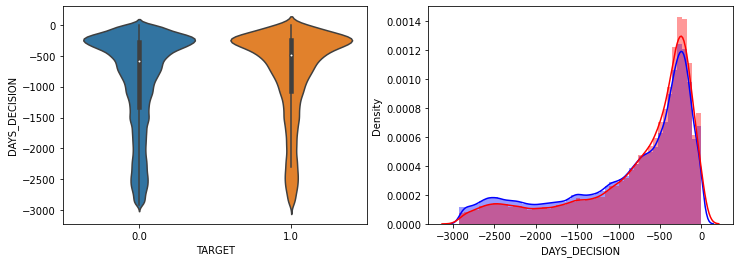

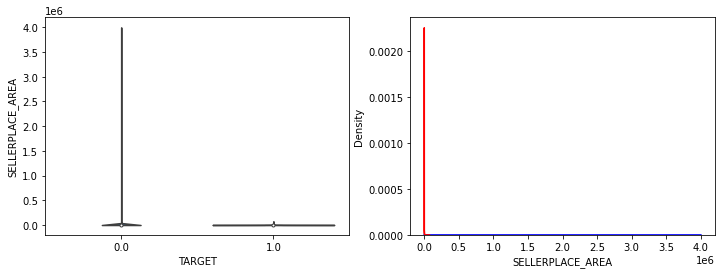

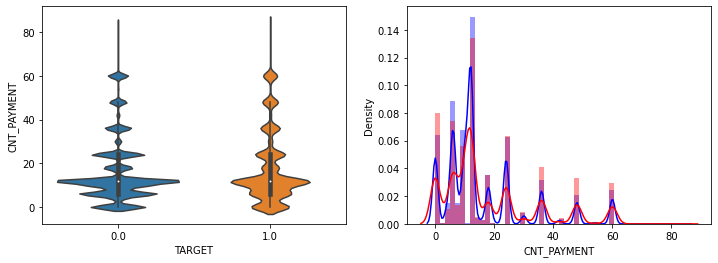

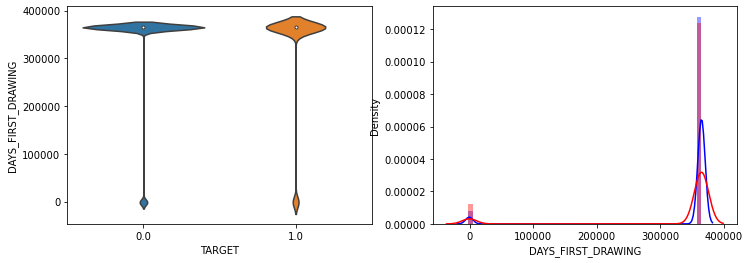

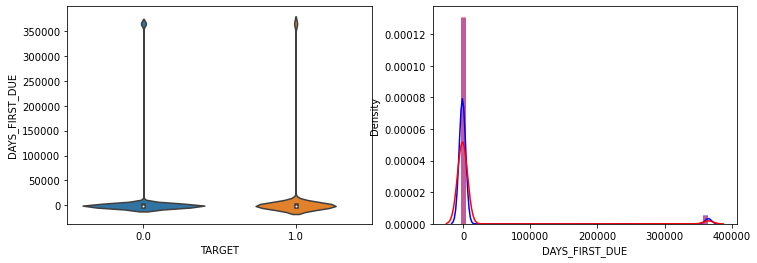

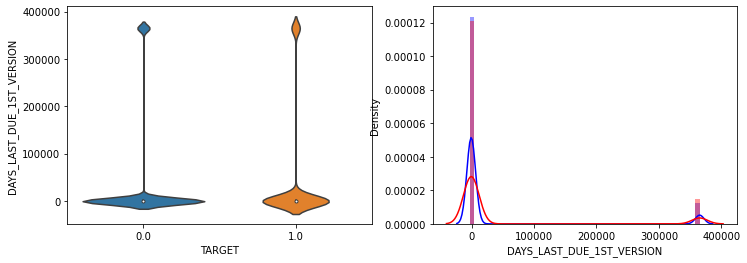

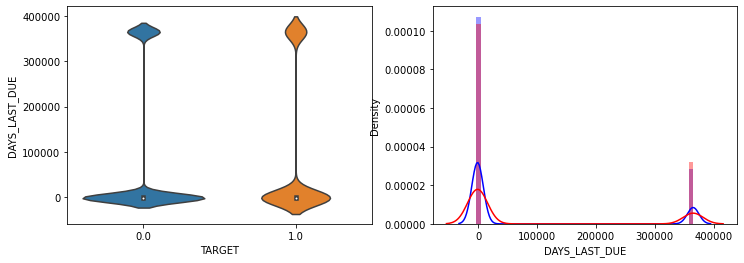

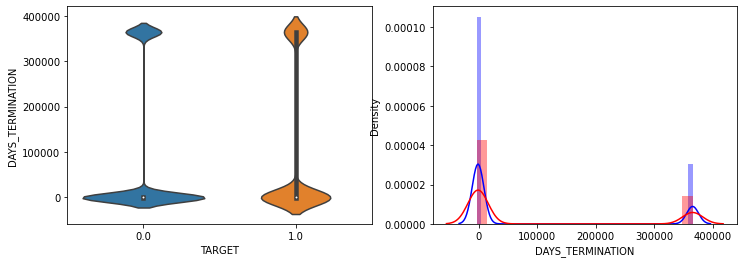

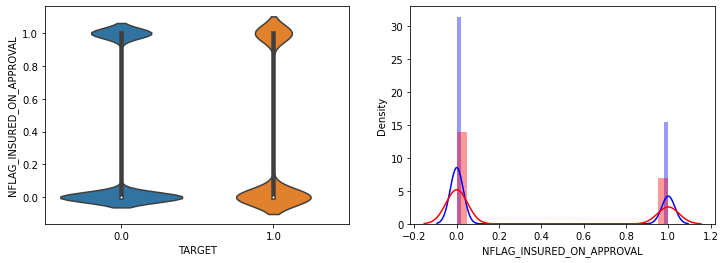

In [15]:
show_hist_by_target(app_prev, num_columns)

In [16]:
def show_category_by_target(df, columns):
    for column in columns:
        print('column name:', column)
        chart = sns.catplot(x=column, col='TARGET', data=df, kind='count')
        chart.set_xticklabels(rotation=65)

In [17]:
object_columns = app_prev.dtypes[app_prev.dtypes == 'object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

column name: NAME_CONTRACT_TYPE
column name: WEEKDAY_APPR_PROCESS_START
column name: FLAG_LAST_APPL_PER_CONTRACT
column name: NAME_CASH_LOAN_PURPOSE
column name: NAME_CONTRACT_STATUS
column name: NAME_PAYMENT_TYPE
column name: CODE_REJECT_REASON
column name: NAME_TYPE_SUITE
column name: NAME_CLIENT_TYPE
column name: NAME_GOODS_CATEGORY
column name: NAME_PORTFOLIO
column name: NAME_PRODUCT_TYPE
column name: CHANNEL_TYPE
column name: NAME_SELLER_INDUSTRY
column name: NAME_YIELD_GROUP
column name: PRODUCT_COMBINATION


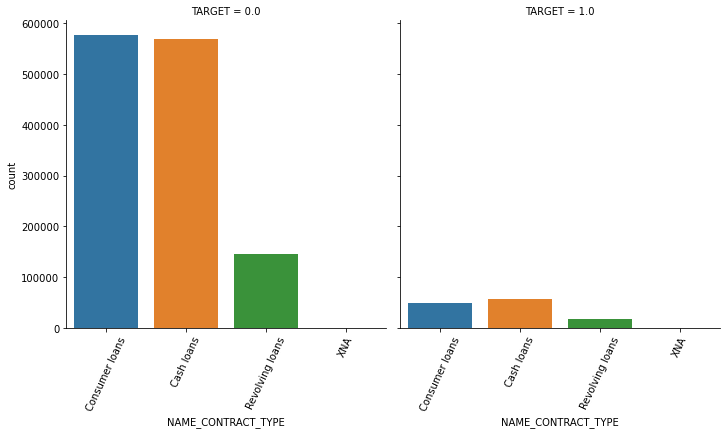

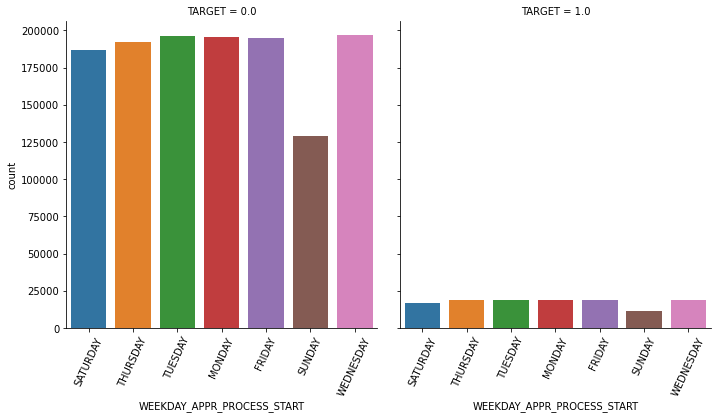

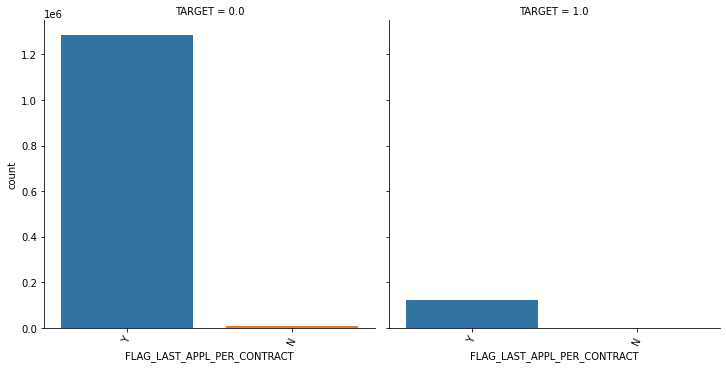

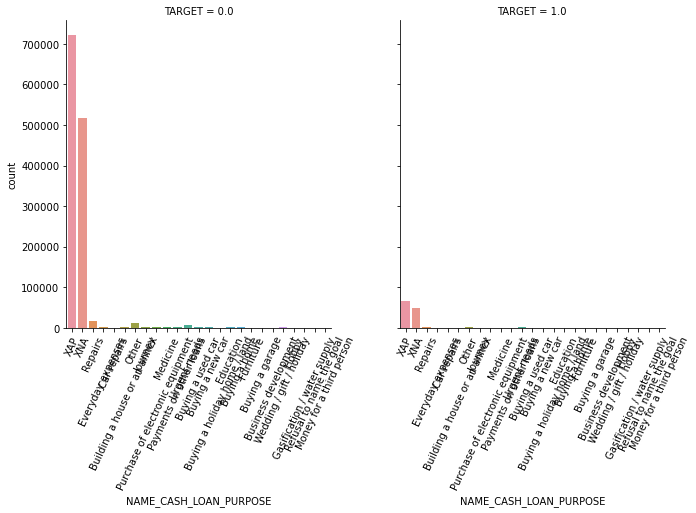

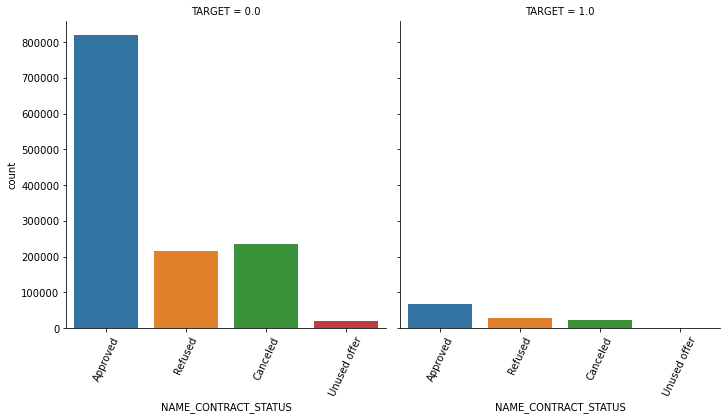

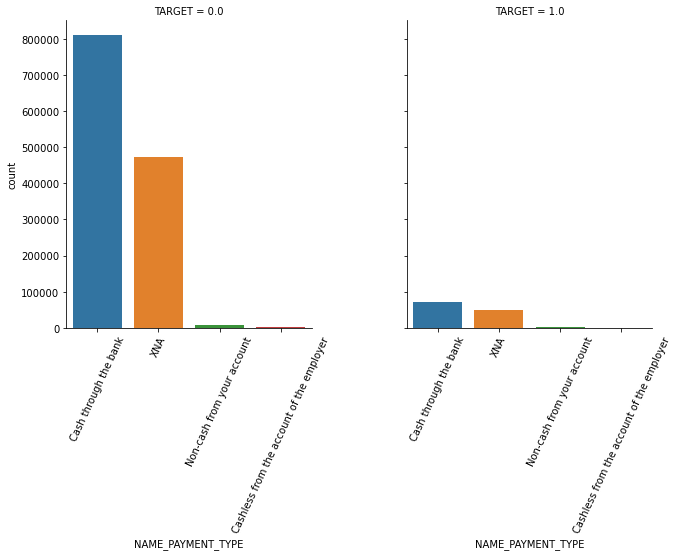

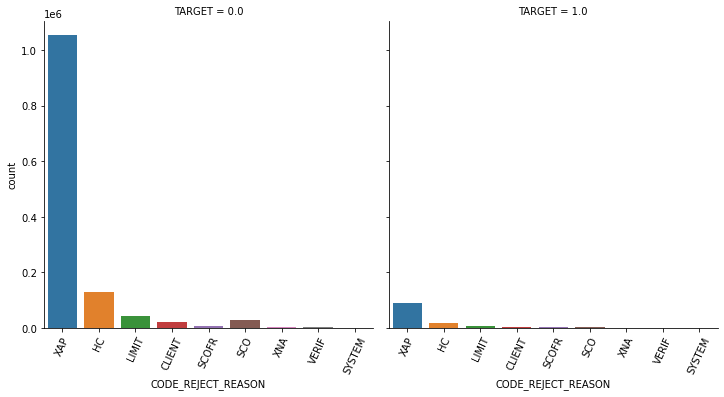

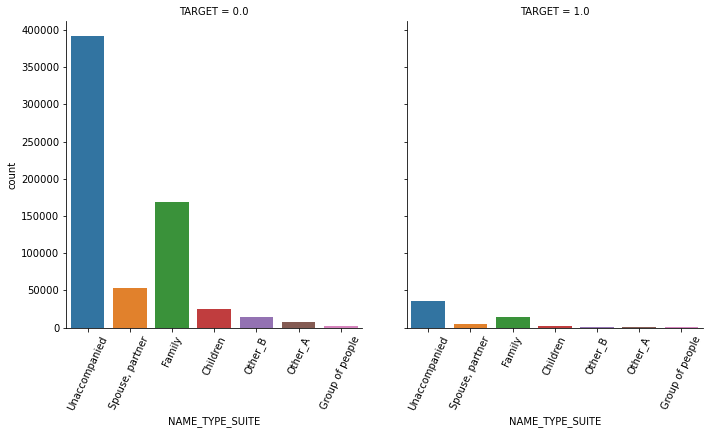

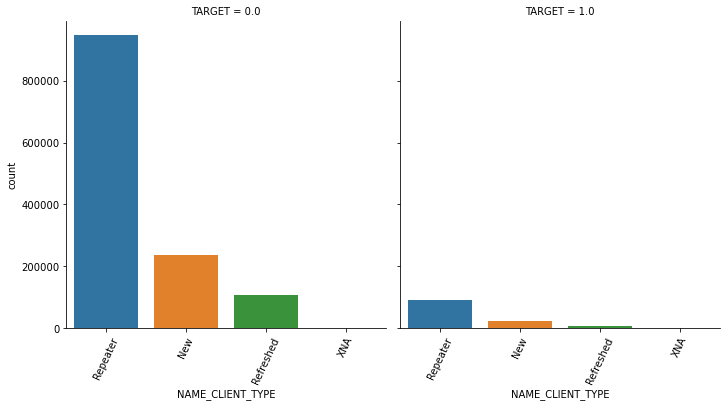

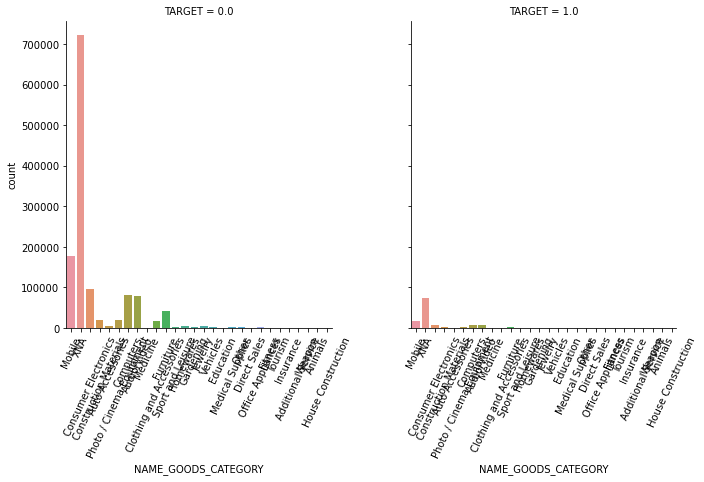

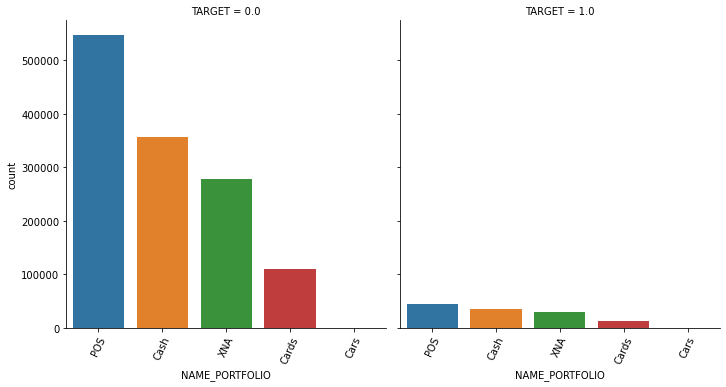

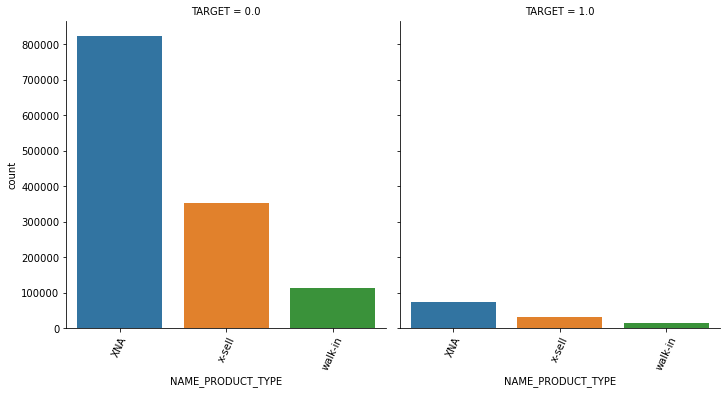

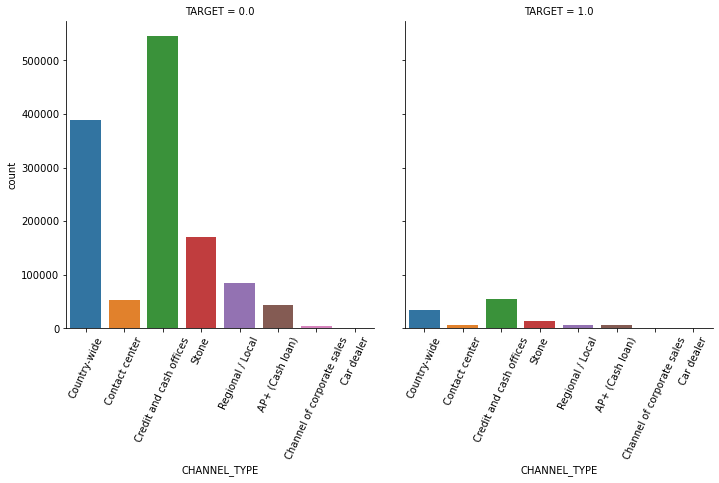

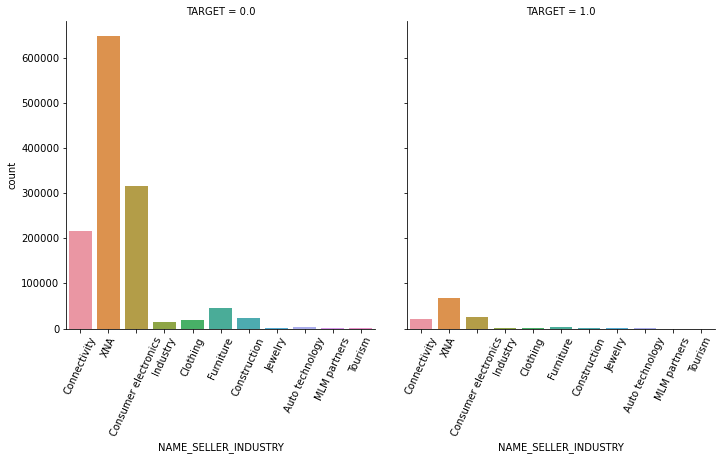

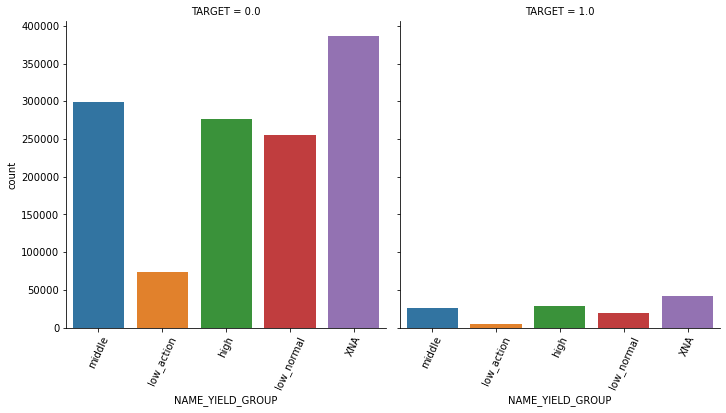

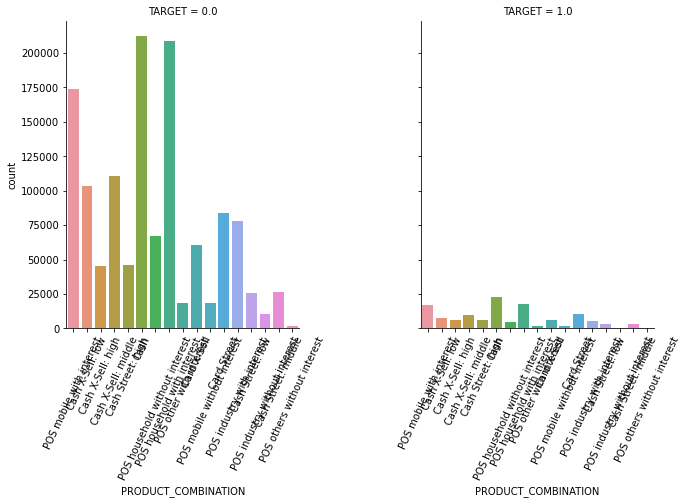

In [18]:
show_category_by_target(app_prev, object_columns)

In [19]:
prev.groupby('SK_ID_CURR')

In [20]:
prev_group = prev.groupby('SK_ID_CURR')

prev_agg = pd.DataFrame()
prev_agg['CNT'] = prev_group['SK_ID_CURR'].count()
prev_agg['AVG_CREDIT'] = prev_group['AMT_CREDIT'].mean()
prev_agg['MAX_CREDIT'] = prev_group['AMT_CREDIT'].max()
prev_agg['MIN_CREDIT'] = prev_group['AMT_CREDIT'].min()

prev_agg.head(10)

,CNT,AVG_CREDIT,MAX_CREDIT,MIN_CREDIT
SK_ID_CURR,,,,
100001,1,23787.000000,23787.0,23787.0
100002,1,179055.000000,179055.0,179055.0
100003,3,484191.000000,1035882.0,68053.5
100004,1,20106.000000,20106.0,20106.0
100005,2,20076.750000,40153.5,0.0
100006,9,291695.500000,906615.0,0.0
100007,6,166638.750000,284400.0,14616.0
100008,5,162767.700000,501975.0,0.0
100009,7,70137.642857,98239.5,38574.0


In [21]:
prev_agg1 = prev_group['AMT_CREDIT'].agg(['mean', 'max', 'min'])
prev_agg2 = prev_group['AMT_ANNUITY'].agg(['mean', 'max', 'min'])

prev_agg = prev_agg1.merge(prev_agg2, on='SK_ID_CURR', how='inner')
prev_agg.head(10)

,mean_x,max_x,min_x,mean_y,max_y,min_y
SK_ID_CURR,,,,,,
100001,23787.000000,23787.0,23787.0,3951.000000,3951.000,3951.000
100002,179055.000000,179055.0,179055.0,9251.775000,9251.775,9251.775
100003,484191.000000,1035882.0,68053.5,56553.990000,98356.995,6737.310
100004,20106.000000,20106.0,20106.0,5357.250000,5357.250,5357.250
100005,20076.750000,40153.5,0.0,4813.200000,4813.200,4813.200
100006,291695.500000,906615.0,0.0,23651.175000,39954.510,2482.920
100007,166638.750000,284400.0,14616.0,12278.805000,22678.785,1834.290
100008,162767.700000,501975.0,0.0,15839.696250,25309.575,8019.090
100009,70137.642857,98239.5,38574.0,10051.412143,17341.605,7435.845


In [22]:
agg_dict = {
    'SK_ID_CURR':['count'],
    'AMT_CREDIT':['mean', 'max', 'sum'],
    'AMT_ANNUITY':['mean', 'max', 'sum'], 
    'AMT_APPLICATION':['mean', 'max', 'sum'],
    'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
    'AMT_GOODS_PRICE':['mean', 'max', 'sum']
}

prev_amt_agg = prev_group.agg(agg_dict)
prev_amt_agg.head(10)

SK_ID_CURR     AMT_CREDIT                         AMT_ANNUITY  \
                count           mean        max        sum          mean   
SK_ID_CURR                                                                 
100001              1   23787.000000    23787.0    23787.0   3951.000000   
100002              1  179055.000000   179055.0   179055.0   9251.775000   
100003              3  484191.000000  1035882.0  1452573.0  56553.990000   
100004              1   20106.000000    20106.0    20106.0   5357.250000   
100005              2   20076.750000    40153.5    40153.5   4813.200000   
100006              9  291695.500000   906615.0  2625259.5  23651.175000   
100007              6  166638.750000   284400.0   999832.5  12278.805000   
100008              5  162767.700000   501975.0   813838.5  15839.696250   
100009              7   70137.642857    98239.5   490963.5  10051.412143   
100010              1  260811.000000   260811.0   260811.0  27463.410000   

                                  AMT_APPLICATION                        \
                  max         sum            mean       max         sum   
SK_ID_CURR                                                                
100001       3951.000    3951.000    24835.500000   24835.5    24835.50   
100002       9251.775    9251.775   179055.000000  179055.0   179055.00   
100003      98356.995  169661.970   435436.500000  900000.0  1306309.50   
100004       5357.250    5357.250    24282.000000   24282.0    24282.00   
100005       4813.200    4813.200    22308.750000   44617.5    44617.50   
100006      39954.510  141907.050   272203.260000  688500.0  2449829.34   
100007      22678.785   73672.830   150530.250000  247500.0   903181.50   
100008      25309.575   63358.785   155701.800000  450000.0   778509.00   
100009      17341.605   70359.885    76741.714286  110160.0   537192.00   
100010      27463.410   27463.410   247212.000000  247212.0   247212.00   

           AMT_DOWN_PAYMENT                    AMT_GOODS_PRICE            \
                       mean      max       sum            mean       max   
SK_ID_CURR                                                                 
100001          2520.000000   2520.0   2520.00    24835.500000   24835.5   
100002             0.000000      0.0      0.00   179055.000000  179055.0   
100003          3442.500000   6885.0   6885.00   435436.500000  900000.0   
100004          4860.000000   4860.0   4860.00    24282.000000   24282.0   
100005          4464.000000   4464.0   4464.00    44617.500000   44617.5   
100006         34840.170000  66987.0  69680.34   408304.890000  688500.0   
100007          3390.750000   3676.5   6781.50   150530.250000  247500.0   
100008          5548.500000  12145.5  16645.50   194627.250000  450000.0   
100009          9203.142857  22032.0  64422.00    76741.714286  110160.0   
100010             0.000000      0.0      0.00   247212.000000  247212.0   

                        
                   sum  
SK_ID_CURR              
100001        24835.50  
100002       179055.00  
100003      1306309.50  
100004        24282.00  
100005        44617.50  
100006      2449829.34  
100007       903181.50  
100008       778509.00  
100009       537192.00  
100010       247212.00

In [23]:
prev_amt_agg.columns

MultiIndex([(      'SK_ID_CURR', 'count'),
            (      'AMT_CREDIT',  'mean'),
            (      'AMT_CREDIT',   'max'),
            (      'AMT_CREDIT',   'sum'),
            (     'AMT_ANNUITY',  'mean'),
            (     'AMT_ANNUITY',   'max'),
            (     'AMT_ANNUITY',   'sum'),
            ( 'AMT_APPLICATION',  'mean'),
            ( 'AMT_APPLICATION',   'max'),
            ( 'AMT_APPLICATION',   'sum'),
            ('AMT_DOWN_PAYMENT',  'mean'),
            ('AMT_DOWN_PAYMENT',   'max'),
            ('AMT_DOWN_PAYMENT',   'sum'),
            ( 'AMT_GOODS_PRICE',  'mean'),
            ( 'AMT_GOODS_PRICE',   'max'),
            ( 'AMT_GOODS_PRICE',   'sum')],
           )

In [24]:
prev_amt_agg.columns = ['PREV_'+('_').join(column).upper() for column in prev_amt_agg.columns.ravel()]

In [25]:
prev_amt_agg.head()

,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM
SK_ID_CURR,,,,,,,,,,,,,,,,
100001,1,23787.00,23787.0,23787.0,3951.000,3951.000,3951.000,24835.50,24835.5,24835.5,2520.0,2520.0,2520.0,24835.5,24835.5,24835.5
100002,1,179055.00,179055.0,179055.0,9251.775,9251.775,9251.775,179055.00,179055.0,179055.0,0.0,0.0,0.0,179055.0,179055.0,179055.0
100003,3,484191.00,1035882.0,1452573.0,56553.990,98356.995,169661.970,435436.50,900000.0,1306309.5,3442.5,6885.0,6885.0,435436.5,900000.0,1306309.5
100004,1,20106.00,20106.0,20106.0,5357.250,5357.250,5357.250,24282.00,24282.0,24282.0,4860.0,4860.0,4860.0,24282.0,24282.0,24282.0
100005,2,20076.75,40153.5,40153.5,4813.200,4813.200,4813.200,22308.75,44617.5,44617.5,4464.0,4464.0,4464.0,44617.5,44617.5,44617.5


In [26]:
prev['PREV_CREDIT_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_CREDIT']
prev['PREV_GOODS_DIFF'] = prev['AMT_APPLICATION'] - prev['AMT_GOODS_PRICE']
prev['PREV_CREDIT_APPL_RATIO'] = prev['AMT_CREDIT'] / prev['AMT_APPLICATION']
prev['PREV_ANNUITY_APPL_RATIO'] = prev['AMT_ANNUITY'] / prev['AMT_APPLICATION']
prev['PREV_GOODS_APPL_RATIO'] = prev['AMT_GOODS_PRICE'] / prev['AMT_APPLICATION']

In [27]:
import numpy as np

prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

prev['PREV_DAYS_LAST_DUE_DIFF'] = prev['DAYS_LAST_DUE_1ST_VERSION'] - prev['DAYS_LAST_DUE']

In [28]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [29]:
all_pay = prev['AMT_ANNUITY'] * prev['CNT_PAYMENT']
prev['PREV_INTERESTS_RATE'] = (all_pay / prev['AMT_CREDIT'] - 1) / prev['CNT_PAYMENT']

In [30]:
prev.iloc[:, -7:].head(10)

,PREV_CREDIT_DIFF,PREV_GOODS_DIFF,PREV_CREDIT_APPL_RATIO,PREV_ANNUITY_APPL_RATIO,PREV_GOODS_APPL_RATIO,PREV_DAYS_LAST_DUE_DIFF,PREV_INTERESTS_RATE
0,0.0,0.0,1.000000,0.100929,1.0,342.0,0.017596
1,-72171.0,0.0,1.118800,0.041463,1.0,NaN,0.009282
2,-23944.5,0.0,1.212840,0.133873,1.0,NaN,0.027047
3,-20790.0,0.0,1.046200,0.104536,1.0,30.0,0.016587
4,-66555.0,0.0,1.197200,0.094591,1.0,NaN,0.037343
5,-25573.5,0.0,1.081186,0.075251,1.0,0.0,0.014044
6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
agg_dict = {
     # 기존 컬럼. 
    'SK_ID_CURR':['count'],
    'AMT_CREDIT':['mean', 'max', 'sum'],
    'AMT_ANNUITY':['mean', 'max', 'sum'], 
    'AMT_APPLICATION':['mean', 'max', 'sum'],
    'AMT_DOWN_PAYMENT':['mean', 'max', 'sum'],
    'AMT_GOODS_PRICE':['mean', 'max', 'sum'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
    # 가공 컬럼
    'PREV_CREDIT_DIFF':['mean', 'max', 'sum'], 
    'PREV_CREDIT_APPL_RATIO':['mean', 'max'],
    'PREV_GOODS_DIFF':['mean', 'max', 'sum'],
    'PREV_GOODS_APPL_RATIO':['mean', 'max'],
    'PREV_DAYS_LAST_DUE_DIFF':['mean', 'max', 'sum'],
    'PREV_INTERESTS_RATE':['mean', 'max']
}

prev_group = prev.groupby('SK_ID_CURR')
prev_amt_agg = prev_group.agg(agg_dict)
prev_amt_agg.columns = ['PREV_' + ('_').join(column).upper() for column in prev_amt_agg.columns.ravel()]

In [32]:
print(prev_amt_agg.shape)
prev_amt_agg.head(10)

(338857, 39)


,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_PREV_INTERESTS_RATE_MEAN,PREV_PREV_INTERESTS_RATE_MAX
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,1,23787.000000,23787.0,23787.0,3951.000000,3951.000,3951.000,24835.500000,24835.5,24835.50,2520.000000,2520.0,2520.00,24835.500000,24835.5,24835.50,0.104326,0.104326,0.104326,-1740,-1740,-1740.000000,8.000000,8.0,1048.500000,1048.5,1048.50,0.957782,0.957782,0.0,0.0,0.0,1.0,1.0,120.0,120.0,120.0,0.041099,0.041099
100002,1,179055.000000,179055.0,179055.0,9251.775000,9251.775,9251.775,179055.000000,179055.0,179055.00,0.000000,0.0,0.00,179055.000000,179055.0,179055.00,0.000000,0.000000,0.000000,-606,-606,-606.000000,24.000000,24.0,0.000000,0.0,0.00,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,150.0,150.0,150.0,0.010003,0.010003
100003,3,484191.000000,1035882.0,1452573.0,56553.990000,98356.995,169661.970,435436.500000,900000.0,1306309.50,3442.500000,6885.0,6885.00,435436.500000,900000.0,1306309.50,0.000000,0.100061,0.050030,-2341,-746,-1305.000000,10.000000,30.0,-48754.500000,756.0,-146263.50,1.057664,1.150980,0.0,0.0,0.0,1.0,1.0,50.0,150.0,150.0,0.015272,0.018533
100004,1,20106.000000,20106.0,20106.0,5357.250000,5357.250,5357.250,24282.000000,24282.0,24282.00,4860.000000,4860.0,4860.00,24282.000000,24282.0,24282.00,0.212008,0.212008,0.212008,-815,-815,-815.000000,4.000000,4.0,4176.000000,4176.0,4176.00,0.828021,0.828021,0.0,0.0,0.0,1.0,1.0,30.0,30.0,30.0,0.016450,0.016450
100005,2,20076.750000,40153.5,40153.5,4813.200000,4813.200,4813.200,22308.750000,44617.5,44617.50,4464.000000,4464.0,4464.00,44617.500000,44617.5,44617.50,0.108964,0.108964,0.108964,-757,-315,-536.000000,12.000000,12.0,2232.000000,4464.0,4464.00,0.899950,0.899950,0.0,0.0,0.0,1.0,1.0,90.0,90.0,90.0,0.036537,0.036537
100006,9,291695.500000,906615.0,2625259.5,23651.175000,39954.510,141907.050,272203.260000,688500.0,2449829.34,34840.170000,66987.0,69680.34,408304.890000,688500.0,2449829.34,0.108994,0.217830,0.163412,-617,-181,-272.444444,23.000000,138.0,-19492.240000,66987.0,-175430.16,1.012684,1.316797,0.0,0.0,0.0,1.0,1.0,810.0,1410.0,1620.0,-inf,0.027424
100007,6,166638.750000,284400.0,999832.5,12278.805000,22678.785,73672.830,150530.250000,247500.0,903181.50,3390.750000,3676.5,6781.50,150530.250000,247500.0,903181.50,0.100143,0.218890,0.159516,-2357,-374,-1222.833333,20.666667,124.0,-16108.500000,2560.5,-96651.00,1.046356,1.264000,0.0,0.0,0.0,1.0,1.0,7.5,30.0,30.0,0.026538,0.036164
100008,5,162767.700000,501975.0,813838.5,15839.696250,25309.575,63358.785,155701.800000,450000.0,778509.00,5548.500000,12145.5,16645.50,194627.250000,450000.0,778509.00,0.000000,0.110243,0.073051,-2536,-82,-1192.000000,14.000000,56.0,-7065.900000,12145.5,-35329.50,0.978569,1.115500,0.0,0.0,0.0,1.0,1.0,165.0,660.0,660.0,0.018055,0.034034
100009,7,70137.642857,98239.5,490963.5,10051.412143,17341.605,70359.885,76741.714286,110160.0,537192.00,9203.142857,22032.0,64422.00,76741.714286,110160.0,537192.00,0.000000,0.209525,0.126602,-1562,-74,-719.285714,8.000000,56.0,6604.071429,17671.5,46228.50,0.916226,1.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0

In [33]:
prev['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [34]:
cond_refused = (prev['NAME_CONTRACT_STATUS'] == 'Refused')
prev_refused = prev[cond_refused]
prev_refused.shape, prev.shape

((290678, 44), (1670214, 44))

In [35]:
prev_refused_agg = prev_refused.groupby('SK_ID_CURR')['SK_ID_CURR'].count()
print(prev_refused_agg.shape, prev_amt_agg.shape)
prev_refused_agg.head()

(118277,) (338857, 39)


SK_ID_CURR
100006     1
100011     1
100027     1
100030    10
100035     8
Name: SK_ID_CURR, dtype: int64

In [36]:
pd.DataFrame(prev_refused_agg)

,SK_ID_CURR
SK_ID_CURR,
100006,1
100011,1
100027,1
100030,10
100035,8
...,...
456244,1
456247,1
456249,1


In [37]:
prev_refused_agg.reset_index(name='PREV_REFUSED_COUNT')

,SK_ID_CURR,PREV_REFUSED_COUNT
0,100006,1
1,100011,1
2,100027,1
3,100030,10
4,100035,8
...,...,...
118272,456244,1
118273,456247,1
118274,456249,1
118275,456250,1


In [38]:
prev_refused_agg = prev_refused_agg.reset_index(name='PREV_REFUSED_COUNT')
prev_amt_agg = prev_amt_agg.reset_index()

prev_amt_refused_agg = prev_amt_agg.merge(prev_refused_agg, on='SK_ID_CURR', how='left')
prev_amt_refused_agg.head(10)

,SK_ID_CURR,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_PREV_INTERESTS_RATE_MEAN,PREV_PREV_INTERESTS_RATE_MAX,PREV_REFUSED_COUNT
0,100001,1,23787.000000,23787.0,23787.0,3951.000000,3951.000,3951.000,24835.500000,24835.5,24835.50,2520.000000,2520.0,2520.00,24835.500000,24835.5,24835.50,0.104326,0.104326,0.104326,-1740,-1740,-1740.000000,8.000000,8.0,1048.500000,1048.5,1048.50,0.957782,0.957782,0.0,0.0,0.0,1.0,1.0,120.0,120.0,120.0,0.041099,0.041099,NaN
1,100002,1,179055.000000,179055.0,179055.0,9251.775000,9251.775,9251.775,179055.000000,179055.0,179055.00,0.000000,0.0,0.00,179055.000000,179055.0,179055.00,0.000000,0.000000,0.000000,-606,-606,-606.000000,24.000000,24.0,0.000000,0.0,0.00,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,150.0,150.0,150.0,0.010003,0.010003,NaN
2,100003,3,484191.000000,1035882.0,1452573.0,56553.990000,98356.995,169661.970,435436.500000,900000.0,1306309.50,3442.500000,6885.0,6885.00,435436.500000,900000.0,1306309.50,0.000000,0.100061,0.050030,-2341,-746,-1305.000000,10.000000,30.0,-48754.500000,756.0,-146263.50,1.057664,1.150980,0.0,0.0,0.0,1.0,1.0,50.0,150.0,150.0,0.015272,0.018533,NaN
3,100004,1,20106.000000,20106.0,20106.0,5357.250000,5357.250,5357.250,24282.000000,24282.0,24282.00,4860.000000,4860.0,4860.00,24282.000000,24282.0,24282.00,0.212008,0.212008,0.212008,-815,-815,-815.000000,4.000000,4.0,4176.000000,4176.0,4176.00,0.828021,0.828021,0.0,0.0,0.0,1.0,1.0,30.0,30.0,30.0,0.016450,0.016450,NaN
4,100005,2,20076.750000,40153.5,40153.5,4813.200000,4813.200,4813.200,22308.750000,44617.5,44617.50,4464.000000,4464.0,4464.00,44617.500000,44617.5,44617.50,0.108964,0.108964,0.108964,-757,-315,-536.000000,12.000000,12.0,2232.000000,4464.0,4464.00,0.899950,0.899950,0.0,0.0,0.0,1.0,1.0,90.0,90.0,90.0,0.036537,0.036537,NaN
5,100006,9,291695.500000,906615.0,2625259.5,23651.175000,39954.510,141907.050,272203.260000,688500.0,2449829.34,34840.170000,66987.0,69680.34,408304.890000,688500.0,2449829.34,0.108994,0.217830,0.163412,-617,-181,-272.444444,23.000000,138.0,-19492.240000,66987.0,-175430.16,1.012684,1.316797,0.0,0.0,0.0,1.0,1.0,810.0,1410.0,1620.0,-inf,0.027424,1.0
6,100007,6,166638.750000,284400.0,999832.5,12278.805000,22678.785,73672.830,150530.250000,247500.0,903181.50,3390.750000,3676.5,6781.50,150530.250000,247500.0,903181.50,0.100143,0.218890,0.159516,-2357,-374,-1222.833333,20.666667,124.0,-16108.500000,2560.5,-96651.00,1.046356,1.264000,0.0,0.0,0.0,1.0,1.0,7.5,30.0,30.0,0.026538,0.036164,NaN
7,100008,5,162767.700000,501975.0,813838.5,15839.696250,25309.575,63358.785,155701.800000,450000.0,778509.00,5548.500000,12145.5,16645.50,194627.250000,450000.0,778509.00,0.000000,0.110243,0.073051,-2536,-82,-1192.000000,14.000000,56.0,-7065.900000,12145.5,-35329.50,0.978569,1.115500,0.0,0.0,0.0,1.0,1.0,165.0,660.0,660.0,0.018055,0.034034,NaN
8,100009,7,70137.642857,98239.5,490963.5,10051.412143,17341.605,70359.885,76741.714286,110160.0,537192.00,9203.142857,22032.0,64422.00,76741.714286,110160.0,537192.00,0.000000,0.209525,0.126602,-1562,-74,-719.285714,8.000000,56.0,6604.071429,17671.5,46228.50,0.916226,1.000000,0.0,0

In [39]:
prev_amt_refused_agg['PREV_REFUSED_COUNT'].value_counts(dropna=False)

NaN     220580
1.0      54616
2.0      26793
3.0      14025
4.0       8243
5.0       4859
6.0       3147
7.0       2069
8.0       1247
9.0        871
10.0       656
11.0       437
12.0       340
13.0       233
14.0       157
15.0       149
16.0        94
17.0        62
18.0        54
19.0        48
20.0        28
21.0        25
22.0        21
24.0        18
25.0        12
23.0        11
26.0        11
27.0         8
28.0         5
29.0         5
32.0         4
41.0         3
31.0         3
37.0         3
30.0         3
39.0         2
35.0         2
34.0         2
33.0         2
36.0         2
68.0         1
47.0         1
43.0         1
54.0         1
51.0         1
64.0         1
58.0         1
Name: PREV_REFUSED_COUNT, dtype: int64

In [40]:
prev_amt_refused_agg = prev_amt_refused_agg.fillna(0)
prev_amt_refused_agg['PREV_REFUSED_RATIO'] = (prev_amt_refused_agg['PREV_REFUSED_COUNT'] 
                                            / prev_amt_refused_agg['PREV_SK_ID_CURR_COUNT'])
prev_amt_refused_agg.head(10)

,SK_ID_CURR,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_PREV_INTERESTS_RATE_MEAN,PREV_PREV_INTERESTS_RATE_MAX,PREV_REFUSED_COUNT,PREV_REFUSED_RATIO
0,100001,1,23787.000000,23787.0,23787.0,3951.000000,3951.000,3951.000,24835.500000,24835.5,24835.50,2520.000000,2520.0,2520.00,24835.500000,24835.5,24835.50,0.104326,0.104326,0.104326,-1740,-1740,-1740.000000,8.000000,8.0,1048.500000,1048.5,1048.50,0.957782,0.957782,0.0,0.0,0.0,1.0,1.0,120.0,120.0,120.0,0.041099,0.041099,0.0,0.000000
1,100002,1,179055.000000,179055.0,179055.0,9251.775000,9251.775,9251.775,179055.000000,179055.0,179055.00,0.000000,0.0,0.00,179055.000000,179055.0,179055.00,0.000000,0.000000,0.000000,-606,-606,-606.000000,24.000000,24.0,0.000000,0.0,0.00,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,150.0,150.0,150.0,0.010003,0.010003,0.0,0.000000
2,100003,3,484191.000000,1035882.0,1452573.0,56553.990000,98356.995,169661.970,435436.500000,900000.0,1306309.50,3442.500000,6885.0,6885.00,435436.500000,900000.0,1306309.50,0.000000,0.100061,0.050030,-2341,-746,-1305.000000,10.000000,30.0,-48754.500000,756.0,-146263.50,1.057664,1.150980,0.0,0.0,0.0,1.0,1.0,50.0,150.0,150.0,0.015272,0.018533,0.0,0.000000
3,100004,1,20106.000000,20106.0,20106.0,5357.250000,5357.250,5357.250,24282.000000,24282.0,24282.00,4860.000000,4860.0,4860.00,24282.000000,24282.0,24282.00,0.212008,0.212008,0.212008,-815,-815,-815.000000,4.000000,4.0,4176.000000,4176.0,4176.00,0.828021,0.828021,0.0,0.0,0.0,1.0,1.0,30.0,30.0,30.0,0.016450,0.016450,0.0,0.000000
4,100005,2,20076.750000,40153.5,40153.5,4813.200000,4813.200,4813.200,22308.750000,44617.5,44617.50,4464.000000,4464.0,4464.00,44617.500000,44617.5,44617.50,0.108964,0.108964,0.108964,-757,-315,-536.000000,12.000000,12.0,2232.000000,4464.0,4464.00,0.899950,0.899950,0.0,0.0,0.0,1.0,1.0,90.0,90.0,90.0,0.036537,0.036537,0.0,0.000000
5,100006,9,291695.500000,906615.0,2625259.5,23651.175000,39954.510,141907.050,272203.260000,688500.0,2449829.34,34840.170000,66987.0,69680.34,408304.890000,688500.0,2449829.34,0.108994,0.217830,0.163412,-617,-181,-272.444444,23.000000,138.0,-19492.240000,66987.0,-175430.16,1.012684,1.316797,0.0,0.0,0.0,1.0,1.0,810.0,1410.0,1620.0,-inf,0.027424,1.0,0.111111
6,100007,6,166638.750000,284400.0,999832.5,12278.805000,22678.785,73672.830,150530.250000,247500.0,903181.50,3390.750000,3676.5,6781.50,150530.250000,247500.0,903181.50,0.100143,0.218890,0.159516,-2357,-374,-1222.833333,20.666667,124.0,-16108.500000,2560.5,-96651.00,1.046356,1.264000,0.0,0.0,0.0,1.0,1.0,7.5,30.0,30.0,0.026538,0.036164,0.0,0.000000
7,100008,5,162767.700000,501975.0,813838.5,15839.696250,25309.575,63358.785,155701.800000,450000.0,778509.00,5548.500000,12145.5,16645.50,194627.250000,450000.0,778509.00,0.000000,0.110243,0.073051,-2536,-82,-1192.000000,14.000000,56.0,-7065.900000,12145.5,-35329.50,0.978569,1.115500,0.0,0.0,0.0,1.0,1.0,165.0,660.0,660.0,0.018055,0.034034,0.0,0.000000
8,100009,7,70137.642857,98239.5,490963.5,10051.412143,17341.605,70359.885,76741.714286,110160.0,537192.00,9203.142857,22032.0,64422.00,76741.714286,110160.0,537192.00,0.000000,0.209525,0.1266

In [41]:
prev_refused_appr_group = prev[prev['NAME_CONTRACT_STATUS'].isin(['Approved', 'Refused'])].groupby(['SK_ID_CURR', 'NAME_CONTRACT_STATUS'])
prev_refused_appr_group['SK_ID_CURR'].count()

SK_ID_CURR  NAME_CONTRACT_STATUS
100001      Approved                1
100002      Approved                1
100003      Approved                3
100004      Approved                1
100005      Approved                1
                                   ..
456252      Approved                1
456253      Approved                2
456254      Approved                2
456255      Approved                6
            Refused                 2
Name: SK_ID_CURR, Length: 455975, dtype: int64

In [42]:
prev_refused_appr_agg = prev_refused_appr_group['SK_ID_CURR'].count().unstack()
prev_refused_appr_agg.head(30)

NAME_CONTRACT_STATUS,Approved,Refused
SK_ID_CURR,,
100001,1.0,NaN
100002,1.0,NaN
100003,3.0,NaN
100004,1.0,NaN
100005,1.0,NaN
100006,5.0,1.0
100007,6.0,NaN
100008,4.0,NaN
100009,7.0,NaN


In [43]:
prev_refused_appr_agg = prev_refused_appr_agg.fillna(0)
prev_refused_appr_agg.columns = ['PREV_APPROVED_COUNT', 'PREV_REFUSED_COUNT']
prev_refused_appr_agg = prev_refused_appr_agg.reset_index()
prev_refused_appr_agg.head(10)

,SK_ID_CURR,PREV_APPROVED_COUNT,PREV_REFUSED_COUNT
0,100001,1.0,0.0
1,100002,1.0,0.0
2,100003,3.0,0.0
3,100004,1.0,0.0
4,100005,1.0,0.0
5,100006,5.0,1.0
6,100007,6.0,0.0
7,100008,4.0,0.0
8,100009,7.0,0.0
9,100010,1.0,0.0


In [44]:
prev_agg = prev_amt_agg.merge(prev_refused_appr_agg, on='SK_ID_CURR', how='left')
prev_agg['PREV_REFUSED_RATIO'] = prev_agg['PREV_REFUSED_COUNT'] / prev_agg['PREV_SK_ID_CURR_COUNT']
prev_agg['PREV_APPROVED_RATIO'] = prev_agg['PREV_APPROVED_COUNT'] / prev_agg['PREV_SK_ID_CURR_COUNT']
prev_agg = prev_agg.drop(['PREV_REFUSED_COUNT', 'PREV_APPROVED_COUNT'], axis=1)
prev_agg.head()

,SK_ID_CURR,PREV_SK_ID_CURR_COUNT,PREV_AMT_CREDIT_MEAN,PREV_AMT_CREDIT_MAX,PREV_AMT_CREDIT_SUM,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_MAX,PREV_AMT_ANNUITY_SUM,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_MAX,PREV_AMT_APPLICATION_SUM,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_DOWN_PAYMENT_MAX,PREV_AMT_DOWN_PAYMENT_SUM,PREV_AMT_GOODS_PRICE_MEAN,PREV_AMT_GOODS_PRICE_MAX,PREV_AMT_GOODS_PRICE_SUM,PREV_RATE_DOWN_PAYMENT_MIN,PREV_RATE_DOWN_PAYMENT_MAX,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MIN,PREV_DAYS_DECISION_MAX,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_CNT_PAYMENT_SUM,PREV_PREV_CREDIT_DIFF_MEAN,PREV_PREV_CREDIT_DIFF_MAX,PREV_PREV_CREDIT_DIFF_SUM,PREV_PREV_CREDIT_APPL_RATIO_MEAN,PREV_PREV_CREDIT_APPL_RATIO_MAX,PREV_PREV_GOODS_DIFF_MEAN,PREV_PREV_GOODS_DIFF_MAX,PREV_PREV_GOODS_DIFF_SUM,PREV_PREV_GOODS_APPL_RATIO_MEAN,PREV_PREV_GOODS_APPL_RATIO_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_MEAN,PREV_PREV_DAYS_LAST_DUE_DIFF_MAX,PREV_PREV_DAYS_LAST_DUE_DIFF_SUM,PREV_PREV_INTERESTS_RATE_MEAN,PREV_PREV_INTERESTS_RATE_MAX,PREV_REFUSED_RATIO,PREV_APPROVED_RATIO
0,100001,1,23787.00,23787.0,23787.0,3951.000,3951.000,3951.000,24835.50,24835.5,24835.5,2520.0,2520.0,2520.0,24835.5,24835.5,24835.5,0.104326,0.104326,0.104326,-1740,-1740,-1740.0,8.0,8.0,1048.5,1048.5,1048.5,0.957782,0.957782,0.0,0.0,0.0,1.0,1.0,120.0,120.0,120.0,0.041099,0.041099,0.0,1.0
1,100002,1,179055.00,179055.0,179055.0,9251.775,9251.775,9251.775,179055.00,179055.0,179055.0,0.0,0.0,0.0,179055.0,179055.0,179055.0,0.000000,0.000000,0.000000,-606,-606,-606.0,24.0,24.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,1.0,1.0,150.0,150.0,150.0,0.010003,0.010003,0.0,1.0
2,100003,3,484191.00,1035882.0,1452573.0,56553.990,98356.995,169661.970,435436.50,900000.0,1306309.5,3442.5,6885.0,6885.0,435436.5,900000.0,1306309.5,0.000000,0.100061,0.050030,-2341,-746,-1305.0,10.0,30.0,-48754.5,756.0,-146263.5,1.057664,1.150980,0.0,0.0,0.0,1.0,1.0,50.0,150.0,150.0,0.015272,0.018533,0.0,1.0
3,100004,1,20106.00,20106.0,20106.0,5357.250,5357.250,5357.250,24282.00,24282.0,24282.0,4860.0,4860.0,4860.0,24282.0,24282.0,24282.0,0.212008,0.212008,0.212008,-815,-815,-815.0,4.0,4.0,4176.0,4176.0,4176.0,0.828021,0.828021,0.0,0.0,0.0,1.0,1.0,30.0,30.0,30.0,0.016450,0.016450,0.0,1.0
4,100005,2,20076.75,40153.5,40153.5,4813.200,4813.200,4813.200,22308.75,44617.5,44617.5,4464.0,4464.0,4464.0,44617.5,44617.5,44617.5,0.108964,0.108964,0.108964,-757,-315,-536.0,12.0,12.0,2232.0,4464.0,4464.0,0.899950,0.899950,0.0,0.0,0.0,1.0,1.0,90.0,90.0,90.0,0.036537,0.036537,0.0,0.5
